#### 檔案存取open內建函式的使用
- 在讀取或寫入文件之前，必須使用 Python 內建的 open( ) 函數開啟 文件
- 這個函數將建立一個文件物件，這個文件物件會與真實的文件做連結，可讓您透過文件物件對文件進行存取動作。

```file object = open(file_name [, access_mode])```

- UTF8 編碼資料還請加入另一個參數才可避免亂碼:encoding=‘utf-8'
- file_name：參數是一個字串資料，代表包含要連結的文件名稱。
- access_mode：確定文件必須打開的模式，包括讀取、寫 入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為 讀取(r)
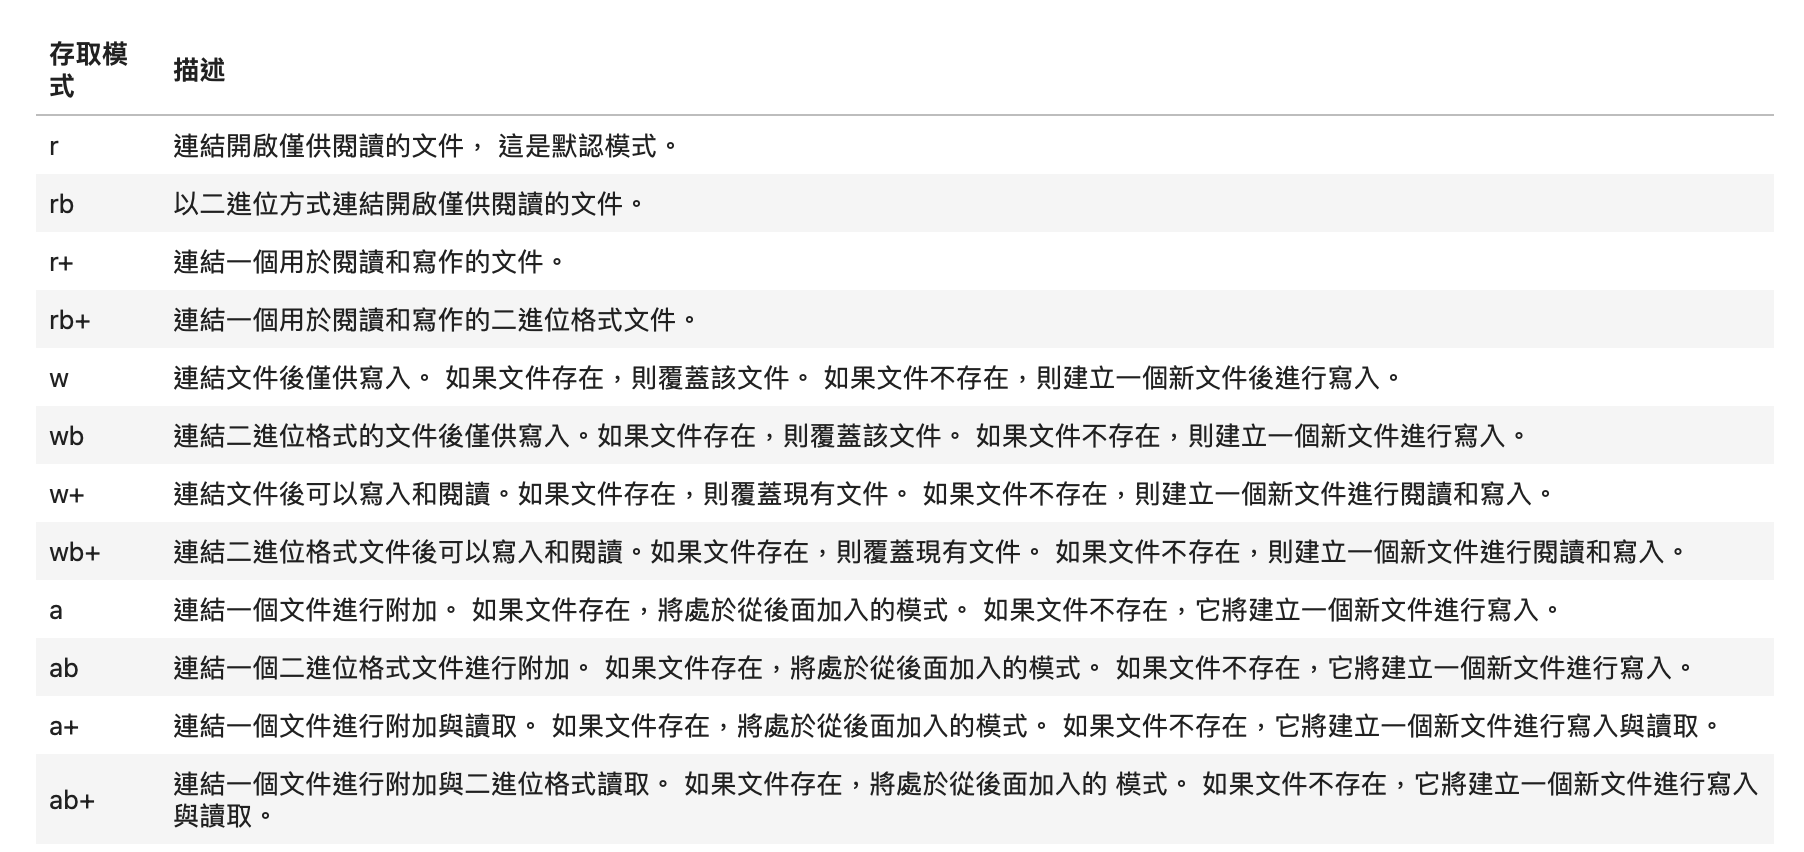

In [10]:
# 操作範例1:建立一個text的文件物件，並且寫入資料
# 使用print()＋open()寫入

text = '''python與中文
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。'''

print(text ,file=open('data.txt','w',encoding='utf-8'))
# print(text ,file=open('data.txt','w'))
# open(資料名稱,'w')－> w 代表文件連結後僅供寫入，且覆蓋該文件原本的內容，如果沒有的話就建立一個data.txt的檔案
# encoding -> 設定打開文件時的編碼格式，如果沒有設定的話預設值＝None，不同平台的預設值都不同，所以設定utf-8萬國碼才可以讀取所有文字（像windows的預設編碼就是GBK編碼>cp936）

In [11]:
# 操作範例2:透過write寫入資料
# 透過內建方法file.write寫入一個字典，並透過創立一個叫score.txt的文件儲存資料

no = 1
scores = dict()

while (True):
    score = int(input(f'請輸入第{no}位的成績:(-1為結束)')) #手動輸入每一個序列的資料
    if score == -1:
        break
    scores[no] = score #把手動輸入的每一筆資料透透過編號儲存到字典
    no += 1

file=open('score.txt' , 'w', encoding='utf-8') # 開啟一個score.txt的文件並提供寫入
file.write(str(scores)) #透過 write的method把scores的資料（dict())寫入txt檔案中
file.close() # 關閉一個已打開的文件。關閉後的文件不能再進行讀寫

#### 檔案讀取 READ函式運用

```read([size]) -> method```

- read([size]) 方法從文件當前位置起讀取 size 個字元數量，若無參數，則代表讀取至文件結束為止
- 中文、英數與換行都是一格

In [18]:
# read讀取整份文件 or read(5) 讀取部分字元數

file = open('data.txt', 'r', encoding='UTF-8') #讀取剛剛建立的data.txt檔案
content = file.read() #透過read方法把僅可閱讀的資料儲存在content實體，沒有寫參數就是讀取整份文件
print(content) 
#file.close( )
print("-------------")

#再新增一個實體contect2，但只閱讀前五個字元數的資料
file = open('data.txt', 'r', encoding='UTF-8') 
content2 = file.read(5) 
print(content2)
file.close( )

python與中文
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
-------------
pytho


#### readline 跟 readlines 的使用
- readline 方法
    1. 這個方法每次讀出一行內容，所以讀取時占用緩衝區較小，比較適合大型文件讀取，讀取到沒有資料為止
    2. 若不使用 readline 可用 with 敘述一行一行讀取資料，再使用 for 迴圈 逐一進行處理
    3. len( ) 代表計算字串字數
    
- readlines 方法
    1. 這方法將讀取整個文件所有行，保存在一個 list 內

#### 讀取文件後可搭配使用的方法
``` 
    1. strip() 去除字串首尾的空白
    2. lstrip( ) 去除字串左邊的空白
    3. rstrip( ) 去除字串右邊的空白
    4. startswith(‘字元’): 第一個字元```

In [26]:
f=open('data.txt', 'r', encoding='UTF-8') #建立一個data1.txt僅可讀取的檔案
result = list( ) #建立一個result實體，並以list的形式儲存，未來儲存讀取後的結果用
for line in f.readlines( ): #for in迴圈，讀取f資料裡的每一行
    line = line.strip( )    #去除資料裡的首尾空白
    if not len(line) or line.startswith('#'): #如果資料內的字串首字不是#註解形式
        continue  #繼續讀取下一行
    result.append(line) #透過.append()方法將line的資料寫入result
f.close() #讀取到資料最後時，自動關閉檔案的讀取寫入權限
result.sort( ) #自動由小排到大
print(result) 

#建立一個新的檔案，並寫入result的資料，並透過.join函式整理內容
open('result-readlines.txt', 'w', encoding='UTF-8').write('%s' % '\n'.join(result))

['1. 我們來試試看中文儲存能力。', '2. 許這個字會有編碼衝突風險。', '3. 犇這個字必須是utf8編碼才有。', 'python與中文']


63